# **Assignment 13**
# **Jupiter - Interplanetary fast shocks**

### **Data Analysis for Space Weather | Instructor: Prof Podladchikova | May, 2021**
### **by Victoria Krivova, Polina Starodumova**

The  objective  of this assignment is to study two kinds of interplanetary shocks and their features using data from the Michigan Solar Wind Model (mSWim) to determine these fast interplanetary shocks. 

In [48]:
# Import the libraries
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import statistics

**Firstly, we import the file with all the necessary information from mSWim model:**

In [2]:
df = pd.read_csv('Earth_Jupiter_OMNI_2015_h.dat', delim_whitespace=True)

**From the dataset, we extract data from 1 to 101 day of the year:**

In [3]:
df_101 = pd.DataFrame()
i = 0
while df['doy'][i] != 102:
    df_101 = df.head(i)
    i+=1

**After that, we calculate the magnitudes of magnetic field and velocity:**

In [4]:
df_101['Bm'] = (df_101['br'] ** 2 + df_101['bt'] ** 2 + df_101['bn'] ** 2) ** 0.5

<ipython-input-4-0bdbb56673b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_101['Bm'] = (df_101['br'] ** 2 + df_101['bt'] ** 2 + df_101['bn'] ** 2) ** 0.5


In [5]:
df_101['Vm'] = (df_101['vr'] ** 2 + df_101['vt'] ** 2 + df_101['vn'] ** 2) ** 0.5

<ipython-input-5-aea627f8cfa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_101['Vm'] = (df_101['vr'] ** 2 + df_101['vt'] ** 2 + df_101['vn'] ** 2) ** 0.5


**Let us see what information we have:**

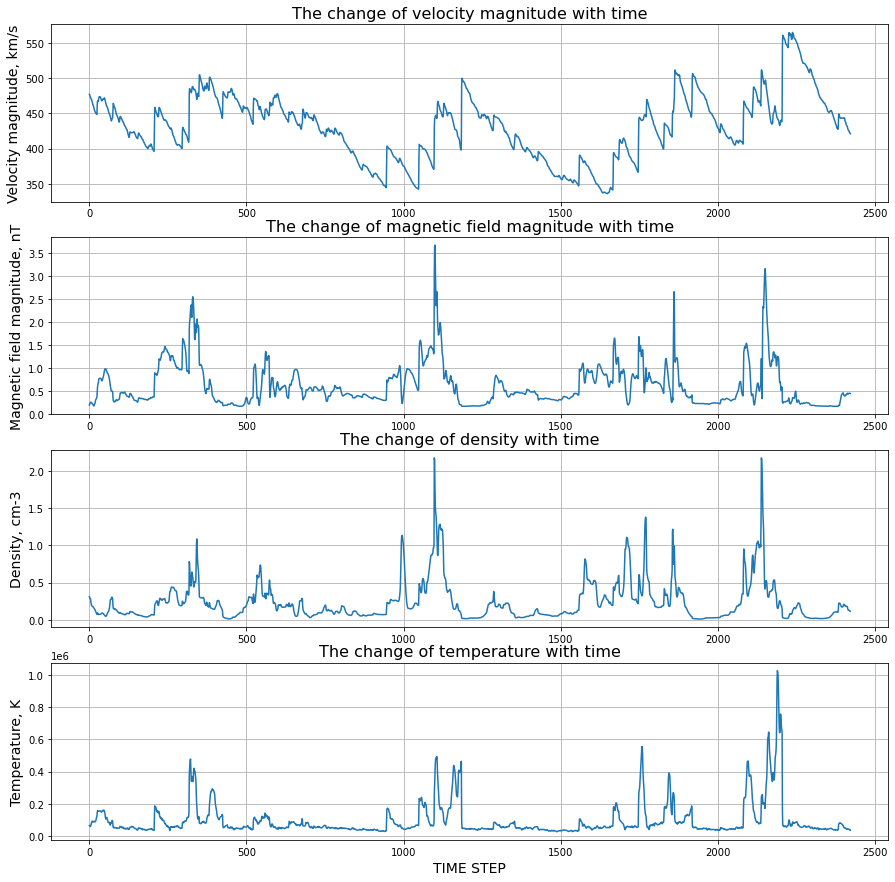

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(15,15))

ax[0].plot(df_101['Vm'], label = 'Velocity magnitude')
ax[0].set_title('The change of velocity magnitude with time', fontsize=16)
ax[0].set_ylabel('Velocity magnitude, km/s', fontsize=14)
ax[0].grid();

ax[1].plot(df_101['Bm'])
ax[1].set_title('The change of magnetic field magnitude with time', fontsize=16)
ax[1].set_ylabel('Magnetic field magnitude, nT', fontsize=14)
ax[1].grid();

ax[2].plot(df_101['rho'])
ax[2].set_title('The change of density with time', fontsize=16)
ax[2].set_ylabel('Density, cm-3', fontsize=14)
ax[2].grid();

ax[3].plot(df_101['T'])
ax[3].set_title('The change of temperature with time', fontsize=16)
ax[3].set_ylabel('Temperature, K', fontsize=14)
ax[3].set_xlabel('TIME STEP', fontsize=14)
ax[3].grid();

**On these graphs, we need to identify Fast forward shock (FS) and Fast reverse shock (RS) during the given time period. Fast forward shock (FS) is characterized by the fact that solar wind speed, density, temperature, and magnetic field magnitude all increase in time, while for Fast reverse shock (RS) solar wind speed is decreasing with increasing density, temperature, and magnetic field magnitude in time.**

**To identify FS and RS automatically, we find areas where the aforementioned conditions are met during at least 4 time steps:**

In [8]:
arr_forw = []
for i in range (len(df_101['Vm']) - 3):
    if df_101['Vm'][i] < df_101['Vm'][i+1] and df_101['Vm'][i+1] < df_101['Vm'][i+2] and df_101['Vm'][i+2] < df_101['Vm'][i+3]:
        if df_101['Bm'][i] < df_101['Vm'][i+1] and df_101['Bm'][i+1] < df_101['Bm'][i+2] and df_101['Bm'][i+2] < df_101['Bm'][i+3]:
            if df_101['rho'][i] < df_101['rho'][i+1] and df_101['rho'][i+1] < df_101['rho'][i+2] and df_101['rho'][i+2] < df_101['rho'][i+3]:
                if df_101['T'][i] < df_101['T'][i+1] and df_101['T'][i+1] < df_101['T'][i+2] and df_101['T'][i+2] < df_101['T'][i+3]:
                    arr_forw.append(i)
forw_shock = np.asarray(arr_forw)

In [9]:
arr_revr = []
for i in range (len(df_101['Vm']) - 3):
    if df_101['Vm'][i] > df_101['Vm'][i+1] and df_101['Vm'][i+1] > df_101['Vm'][i+2] and df_101['Vm'][i+2] > df_101['Vm'][i+3]:
        if df_101['Bm'][i] < df_101['Vm'][i+1] and df_101['Bm'][i+1] < df_101['Bm'][i+2] and df_101['Bm'][i+2] < df_101['Bm'][i+3]:
            if df_101['rho'][i] < df_101['rho'][i+1] and df_101['rho'][i+1] < df_101['rho'][i+2] and df_101['rho'][i+2] < df_101['rho'][i+3]:
                if df_101['T'][i] < df_101['T'][i+1] and df_101['T'][i+1] < df_101['T'][i+2] and df_101['T'][i+2] < df_101['T'][i+3]:
                    arr_revr.append(i)
revr_shock = np.asarray(arr_revr)

**Let us see one example of fast forward and fast reverse shocks:**

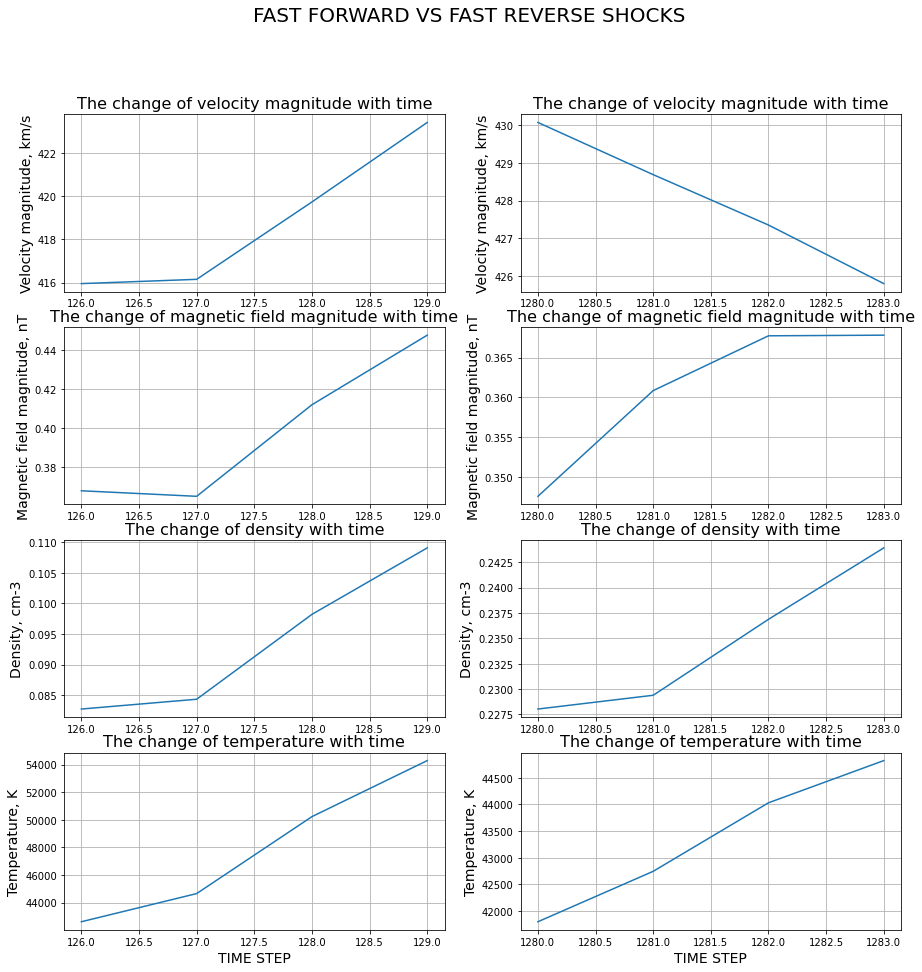

In [85]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))

fig.suptitle("FAST FORWARD VS FAST REVERSE SHOCKS", 
             fontsize=20)

# FAST FORWARD SHOCK
ax[0,0].plot(df_101['Vm'][forw_shock[0]:forw_shock[0]+4], label = 'Velocity magnitude')
ax[0,0].set_title('The change of velocity magnitude with time', fontsize=16)
ax[0,0].set_ylabel('Velocity magnitude, km/s', fontsize=14)
ax[0,0].grid();

ax[1,0].plot(df_101['Bm'][forw_shock[0]:forw_shock[0]+4])
ax[1,0].set_title('The change of magnetic field magnitude with time', fontsize=16)
ax[1,0].set_ylabel('Magnetic field magnitude, nT', fontsize=14)
ax[1,0].grid();

ax[2,0].plot(df_101['rho'][forw_shock[0]:forw_shock[0]+4])
ax[2,0].set_title('The change of density with time', fontsize=16)
ax[2,0].set_ylabel('Density, cm-3', fontsize=14)
ax[2,0].grid();

ax[3,0].plot(df_101['T'][forw_shock[0]:forw_shock[0]+4])
ax[3,0].set_title('The change of temperature with time', fontsize=16)
ax[3,0].set_ylabel('Temperature, K', fontsize=14)
ax[3,0].set_xlabel('TIME STEP', fontsize=14)
ax[3,0].grid();

# FAST REVERSE SHOCK
ax[0,1].plot(df_101['Vm'][revr_shock[0]:revr_shock[0]+4], label = 'Velocity magnitude')
ax[0,1].set_title('The change of velocity magnitude with time', fontsize=16)
ax[0,1].set_ylabel('Velocity magnitude, km/s', fontsize=14)
ax[0,1].grid();

ax[1,1].plot(df_101['Bm'][revr_shock[0]:revr_shock[0]+4])
ax[1,1].set_title('The change of magnetic field magnitude with time', fontsize=16)
ax[1,1].set_ylabel('Magnetic field magnitude, nT', fontsize=14)
ax[1,1].grid();

ax[2,1].plot(df_101['rho'][revr_shock[0]:revr_shock[0]+4])
ax[2,1].set_title('The change of density with time', fontsize=16)
ax[2,1].set_ylabel('Density, cm-3', fontsize=14)
ax[2,1].grid();

ax[3,1].plot(df_101['T'][revr_shock[0]:revr_shock[0]+4])
ax[3,1].set_title('The change of temperature with time', fontsize=16)
ax[3,1].set_ylabel('Temperature, K', fontsize=14)
ax[3,1].set_xlabel('TIME STEP', fontsize=14)
ax[3,1].grid();

**As we see from the graphs, all the values under study for fast forward shock are increasing, whereas the value of velocity in the case of fast reverse shock is decreasing with increasing other values as it should be.**

**Let us create a table which will include all the info regarding detected shocks:**

In [67]:
df_data = pd.DataFrame(columns=['InitTime', 'FinTime', 'DOY', 'Type', 'B1', 'B2', 'N1', 'N2', 'dN', 'v1', 'v2', 'dv', 'meanP'])

In [70]:
mp = 1.6726219e-27 # kg
df_data['dPsw'] = mp * df_data['dN'] * df_data['dv'] ** 2 
df_101['Psw']  = mp * df_101['rho'] * df_101['Vm']  ** 2 

<ipython-input-70-0d3c5ca67249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_101['Psw']  = mp * df_101['rho'] * df_101['Vm']  ** 2


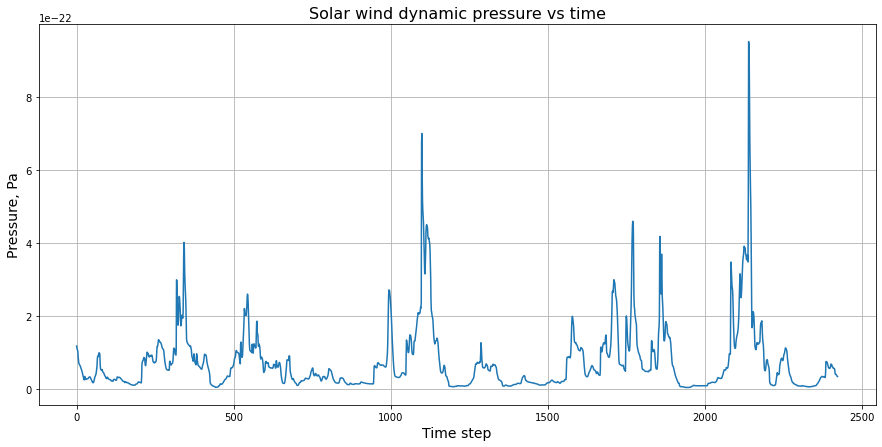

In [71]:
fig = plt.figure(figsize=(15,7))
plt.plot(df_101['Psw'], label = '')
plt.title('Solar wind dynamic pressure vs time', fontsize=16)
plt.ylabel('Pressure, Pa', fontsize=14)
plt.xlabel('Time step', fontsize=14)
plt.grid();

In [72]:
mean = statistics.mean(df_101['Psw'])
median = statistics.median(df_101['Psw'])

In [82]:
for i in range(len(forw_shock)):
    df_data['meanP'][i] = (df_101['Psw'][forw_shock[i]] + df_101['Psw'][forw_shock[i]+1] + 
                           df_101['Psw'][forw_shock[i]+2] + df_101['Psw'][forw_shock[i]+3]) / 4
for i in range(len(revr_shock)):
    df_data['meanP'][len(forw_shock)+i] = (df_101['Psw'][revr_shock[i]] + df_101['Psw'][revr_shock[i]+1] + 
                                           df_101['Psw'][revr_shock[i]+2] + df_101['Psw'][revr_shock[i]+3]) / 4

<ipython-input-82-abb14ff041a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['meanP'][i] = (df_101['Psw'][forw_shock[i]] + df_101['Psw'][forw_shock[i]+1] +
<ipython-input-82-abb14ff041a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['meanP'][len(forw_shock)+i] = (df_101['Psw'][revr_shock[i]] + df_101['Psw'][revr_shock[i]+1] +


In [69]:
for i in range(len(forw_shock)):
    dV = df_101['Vm'][forw_shock[i]+3]-df_101['Vm'][forw_shock[i]]
    dN = df_101['rho'][forw_shock[i]+3]-df_101['rho'][forw_shock[i]]
    df_data.loc[i] = [df_101['%odate'][forw_shock[i]], 
                      df_101['%odate'][forw_shock[i]+3], 
                      df_101['doy'][forw_shock[i]], 
                      'Forward', 
                      df_101['Bm'][forw_shock[i]],  
                      df_101['Bm'][forw_shock[i]+3], 
                      df_101['rho'][forw_shock[i]], 
                      df_101['rho'][forw_shock[i]+3],
                      dN,
                      df_101['Vm'][forw_shock[i]],  
                      df_101['Vm'][forw_shock[i]+3], 
                      dV,
                      0]
for i in range(len(revr_shock)):
    dV = df_101['Vm'][revr_shock[i]+3]-df_101['Vm'][revr_shock[i]]
    dN = df_101['rho'][revr_shock[i]+3]-df_101['rho'][revr_shock[i]]
    df_data.loc[i+len(forw_shock)] = [df_101['%odate'][revr_shock[i]], 
                      df_101['%odate'][revr_shock[i]+3], 
                      df_101['doy'][revr_shock[i]], 
                      'Reverse', 
                      df_101['Bm'][revr_shock[i]],  
                      df_101['Bm'][revr_shock[i]+3], 
                      df_101['rho'][revr_shock[i]], 
                      df_101['rho'][revr_shock[i]+3],
                      dN,
                      df_101['Vm'][revr_shock[i]],  
                      df_101['Vm'][revr_shock[i]+3], 
                      dV,
                      0]                                                         

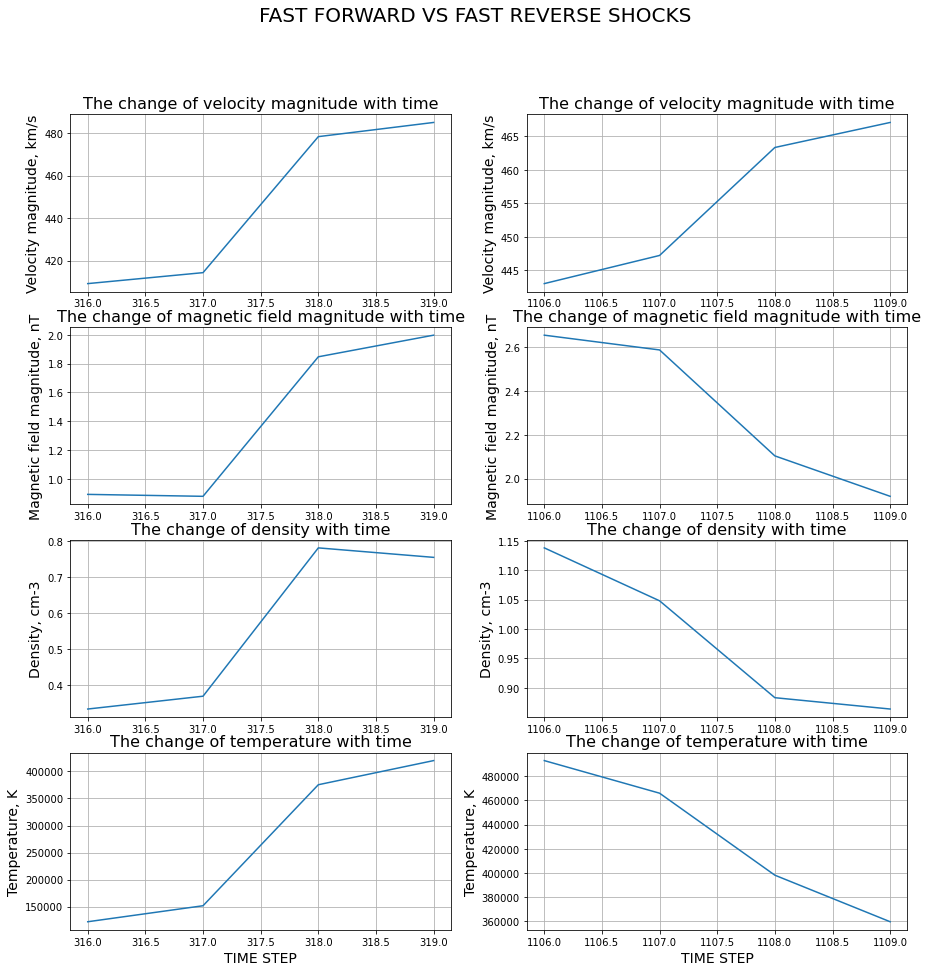

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))

fig.suptitle("FAST FORWARD VS FAST REVERSE SHOCKS", 
             fontsize=20)

# FAST FORWARD SHOCK
ax[0,0].plot(df_101['Vm'][316:320], label = 'Velocity magnitude')
ax[0,0].set_title('The change of velocity magnitude with time', fontsize=16)
ax[0,0].set_ylabel('Velocity magnitude, km/s', fontsize=14)
ax[0,0].grid();

ax[1,0].plot(df_101['Bm'][316:320])
ax[1,0].set_title('The change of magnetic field magnitude with time', fontsize=16)
ax[1,0].set_ylabel('Magnetic field magnitude, nT', fontsize=14)
ax[1,0].grid();

ax[2,0].plot(df_101['rho'][316:320])
ax[2,0].set_title('The change of density with time', fontsize=16)
ax[2,0].set_ylabel('Density, cm-3', fontsize=14)
ax[2,0].grid();

ax[3,0].plot(df_101['T'][316:320])
ax[3,0].set_title('The change of temperature with time', fontsize=16)
ax[3,0].set_ylabel('Temperature, K', fontsize=14)
ax[3,0].set_xlabel('TIME STEP', fontsize=14)
ax[3,0].grid();

# FAST REVERSE SHOCK
ax[0,1].plot(df_101['Vm'][1106:1110], label = 'Velocity magnitude')
ax[0,1].set_title('The change of velocity magnitude with time', fontsize=16)
ax[0,1].set_ylabel('Velocity magnitude, km/s', fontsize=14)
ax[0,1].grid();

ax[1,1].plot(df_101['Bm'][1106:1110])
ax[1,1].set_title('The change of magnetic field magnitude with time', fontsize=16)
ax[1,1].set_ylabel('Magnetic field magnitude, nT', fontsize=14)
ax[1,1].grid();

ax[2,1].plot(df_101['rho'][1106:1110])
ax[2,1].set_title('The change of density with time', fontsize=16)
ax[2,1].set_ylabel('Density, cm-3', fontsize=14)
ax[2,1].grid();

ax[3,1].plot(df_101['T'][1106:1110])
ax[3,1].set_title('The change of temperature with time', fontsize=16)
ax[3,1].set_ylabel('Temperature, K', fontsize=14)
ax[3,1].set_xlabel('TIME STEP', fontsize=14)
ax[3,1].grid();

In [83]:
df_data

,InitTime,FinTime,DOY,Type,B1,B2,N1,N2,dN,v1,v2,dv,meanP,dPsw
0,735604.250012,735604.375012,6,Forward,0.367668,0.447794,0.082733,0.109072,0.026339,415.953603,423.405945,7.452342,2.75038e-23,2.446710e-27
1,735625.708345,735625.833345,27,Forward,0.624741,0.715927,0.177733,0.204537,0.026804,448.857081,452.483276,3.626195,6.43315e-23,5.895217e-28
2,735628.666678,735628.791678,30,Forward,0.500589,0.587663,0.055454,0.067227,0.011772,439.769143,448.019082,8.249939,2.01591e-23,1.340172e-27
3,735629.791678,735629.916678,31,Forward,0.540373,0.610262,0.093323,0.111299,0.017976,421.369292,423.774534,2.405242,3.03491e-23,1.739454e-28
4,735642.625012,735642.750012,44,Forward,0.515930,1.435139,0.195459,0.486651,0.291192,342.303251,406.136339,63.833088,7.70153e-23,1.984581e-24
5,735650.916678,735651.041678,52,Forward,0.178793,0.193545,0.028367,0.038397,0.010029,443.329773,448.131331,4.801558,1.1175e-23,3.867560e-28
6,735651.666678,735651.791678,53,Forward,0.220005,0.276279,0.095912,0.152593,0.056681,442.374712,445.904426,3.529714,4.07574e-23,1.181165e-27
7,735656.833345,735656.958345,58,Forward,0.429476,0.486332,0.039544,0.044895,0.005351,395.574875,399.428152,3.853277,1.12749e-23,1.328953e-28
8,735657.875012,735658.000012,59,Forward,0.478375,0.501084,0.059809,0.085953,0.026144,387.208133,389.401142,2.193009,1.75735e-23,2.103022e-28
9,735661.708345,735661.833345,63,Forward,0.329586,0.369507,0.082864,0.094476,0.011612,356.086164,360.034695,3.948531,1.90592e-23,3.028218e-28


In [64]:
df_data['dv'][0]

7.452341644352941

In [57]:
df_data['Psw']

0     2.446710e-18
1     5.895217e-19
2     1.340172e-18
3     1.739454e-19
4     1.984581e-15
5     3.867560e-19
6     1.181165e-18
7     1.328953e-19
8     2.103022e-19
9     3.028218e-19
10    3.553056e-19
11    7.039114e-20
12    4.790345e-19
13    5.870601e-16
14    1.179253e-15
15    5.022989e-16
16    4.034674e-18
17    9.787582e-19
18    1.679166e-18
19    1.080379e-18
20    4.177794e-17
21    6.463405e-20
22    4.852146e-19
23    1.539709e-20
24    7.319815e-21
Name: Psw, dtype: float64